<a href="https://colab.research.google.com/github/Whyawww/Clustering-Audiens-YoutubeAPIv3/blob/main/Clustering_Audiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : **Wahyu Aji Nusantara**

---


CLUSTERING AUDIENS BERDASARKAN POLA ENGAGEMENT

In [90]:
pip install pandas numpy seaborn matplotlib requests

In [91]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import getpass
import os

if "kunciaja" not in os.environ :
  os.environ["kunciaja"] = getpass.getpass("Add API key")
  print("API key added to environment")
  kunciaja = os.environ["kunciaja"]
else :
  kunciaja = os.environ["kunciaja"]
  print("API key already in environment")

# Channel ID Deddy Corbuzier
CHANNEL_ID = "UCyM52LIpRooUwLH9bWCfkgw"

API key already in environment


Mengambil Daftar Video dalam Playlist

In [92]:
def get_videos_from_playlist(playlist_id, api_key):
    video_ids = []
    next_page_token = None

    while True:
        url = f"https://www.googleapis.com/youtube/v3/playlistItems?part=contentDetails&playlistId={playlist_id}&maxResults=50&key={api_key}"
        if next_page_token:
            url += f"&pageToken={next_page_token}"

        response = requests.get(url).json()

        # DEBUG: Cek response API
        print(response)

        for item in response.get("items", []):
            video_ids.append(item["contentDetails"]["videoId"])

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return video_ids

PLAYLIST_ID = "PLe_K9e2LM-il7CzfCt82ABBbfuqf2trmI"
API_KEY = os.environ["kunciaja"]

# Ambil video dari playlist
video_ids = get_videos_from_playlist(PLAYLIST_ID, API_KEY)
print(f"Total video ditemukan: {len(video_ids)}")

{'kind': 'youtube#playlistItemListResponse', 'etag': '_nSCtJh9McihVMXzpcKw22xDc9M', 'nextPageToken': 'EAAaHlBUOkNESWlFRFU1UkVRME56WTBRelV3TWpreU9USQ', 'items': [{'kind': 'youtube#playlistItem', 'etag': 'E6TppllElSVLGOlyKl02r5xxidw', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS41NkI0NEY2RDEwNTU3Q0M2', 'contentDetails': {'videoId': 'EMZdc03JWEg', 'videoPublishedAt': '2023-09-15T04:20:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'BjEdbnu5T2HO439gTp3mYP3Ej9U', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS4yODlGNEE0NkRGMEEzMEQy', 'contentDetails': {'videoId': 'sNw4Hf9qeko', 'videoPublishedAt': '2023-09-23T01:46:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'D0oXxuih0jkgXZNFmbhLYj9XOqE', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS4wMTcyMDhGQUE4NTIzM0Y5', 'contentDetails': {'videoId': 'M3jIteZtZAo', 'videoPublishedAt': '2023-09-30T01:46:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'IIg8t-UkLyFkJLiIrcaUg4WEMQs', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1c

Mengambil Statistik Engagement Setiap Video

In [93]:
def get_video_statistics(video_ids, api_key):
    stats_list = []

    for video_id in video_ids:
        url = f"https://www.googleapis.com/youtube/v3/videos?part=statistics&id={video_id}&key={api_key}"
        response = requests.get(url).json()

        for item in response.get("items", []):
            stats = item.get("statistics", {})
            stats_list.append({
                "video_id": video_id,
                "views": int(stats.get("viewCount", 0)),
                "likes": int(stats.get("likeCount", 0)),
                "comments": int(stats.get("commentCount", 0))
            })

    return pd.DataFrame(stats_list)

# Mengambil statistik video
df = get_video_statistics(video_ids, API_KEY)

# Simpan ke CSV
df.to_csv("youtube_engagement_data.csv", index=False)
print("Data berhasil disimpan ke youtube_engagement_data.csv")

# Tampilkan beberapa baris pertama
df.head()

Data berhasil disimpan ke youtube_engagement_data.csv


,video_id,views,likes,comments
0,EMZdc03JWEg,4478968,61051,4167
1,sNw4Hf9qeko,5909093,76883,4171
2,M3jIteZtZAo,4734367,67843,3562
3,-j_yu-qc9eY,6214541,112849,4496
4,t7n4PW-ofNg,10489239,179548,7189


# **Data Understanding**

**Data Description**

In [94]:
print("DATA DESCRIPTION")
print("="*40)

# Menampilkan 5 baris pertama data
print("Sample Data:")
print(df.head())

# Melihat struktur dataset
print("\nInformasi Data:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

DATA DESCRIPTION
Sample Data:
      video_id     views   likes  comments
0  EMZdc03JWEg   4478968   61051      4167
1  sNw4Hf9qeko   5909093   76883      4171
2  M3jIteZtZAo   4734367   67843      3562
3  -j_yu-qc9eY   6214541  112849      4496
4  t7n4PW-ofNg  10489239  179548      7189

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  87 non-null     object
 1   views     87 non-null     int64 
 2   likes     87 non-null     int64 
 3   comments  87 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.8+ KB
None

Statistik Deskriptif:
              views          likes      comments
count  8.700000e+01      87.000000     87.000000
mean   6.326819e+06  130213.885057   7304.747126
std    2.619208e+06   64134.950129   4592.152637
min    2.192942e+06   43537.000000   2836.000000
25%    4.542522e+06   88315.000000   4486.

**Data Exploration**


Missing Values Check:
video_id    0
views       0
likes       0
comments    0
dtype: int64


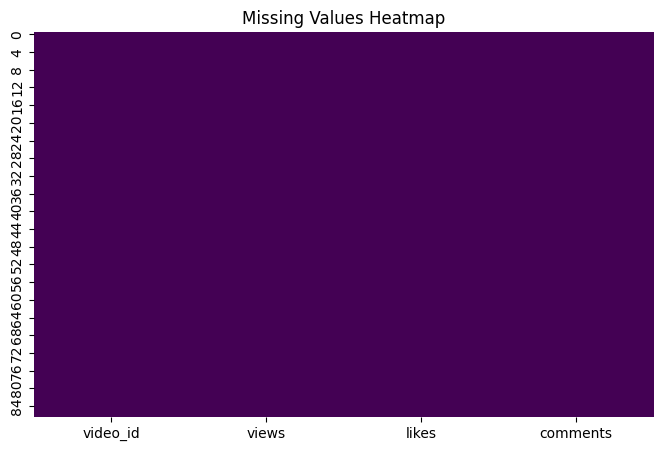

In [95]:
print("\nMissing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)

# Visualisasi missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Konsistensi data

In [96]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

Jumlah baris duplikat: 0


Akurasi Data

In [97]:
invalid_fuel = df[(df['views'] < 0) | (df['likes'] < 0) | (df['comments'] < 0)]
print(f"Jumlah data yang tidak valid: {len(invalid_fuel)}")

Jumlah data yang tidak valid: 0


In [98]:
duplcate_ids = df['video_id'].duplicated()
print(f"Jumlah ID video yang duplikat: {duplcate_ids.sum()}")

Jumlah ID video yang duplikat: 0


Cek Korelasi Antar Variabel

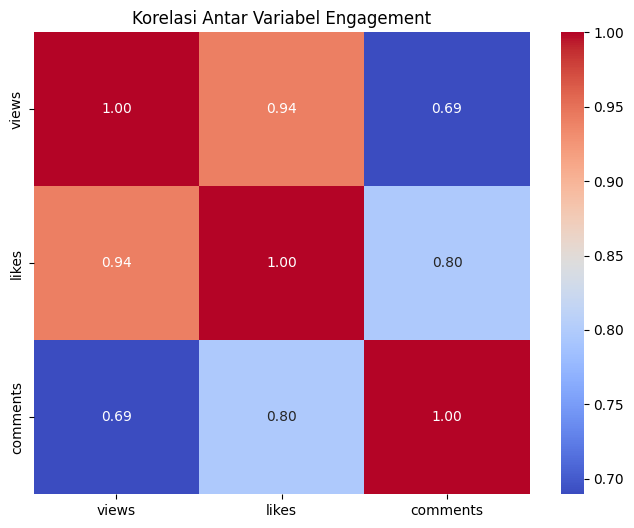

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['views', 'likes', 'comments']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Engagement")
plt.show()

Scatter Plot untuk melihat pola hubungan antar variabel

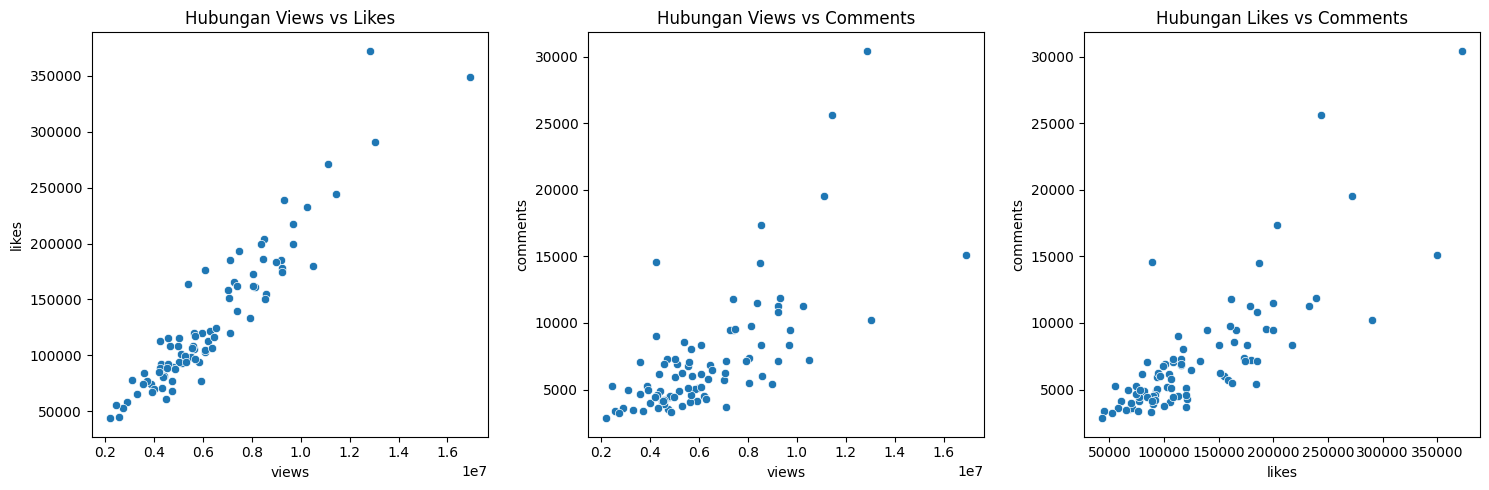

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x=df["views"], y=df["likes"], ax=ax[0])
ax[0].set_title("Hubungan Views vs Likes")

sns.scatterplot(x=df["views"], y=df["comments"], ax=ax[1])
ax[1].set_title("Hubungan Views vs Comments")

sns.scatterplot(x=df["likes"], y=df["comments"], ax=ax[2])
ax[2].set_title("Hubungan Likes vs Comments")

plt.tight_layout()

plt.show()

Distribusi Data

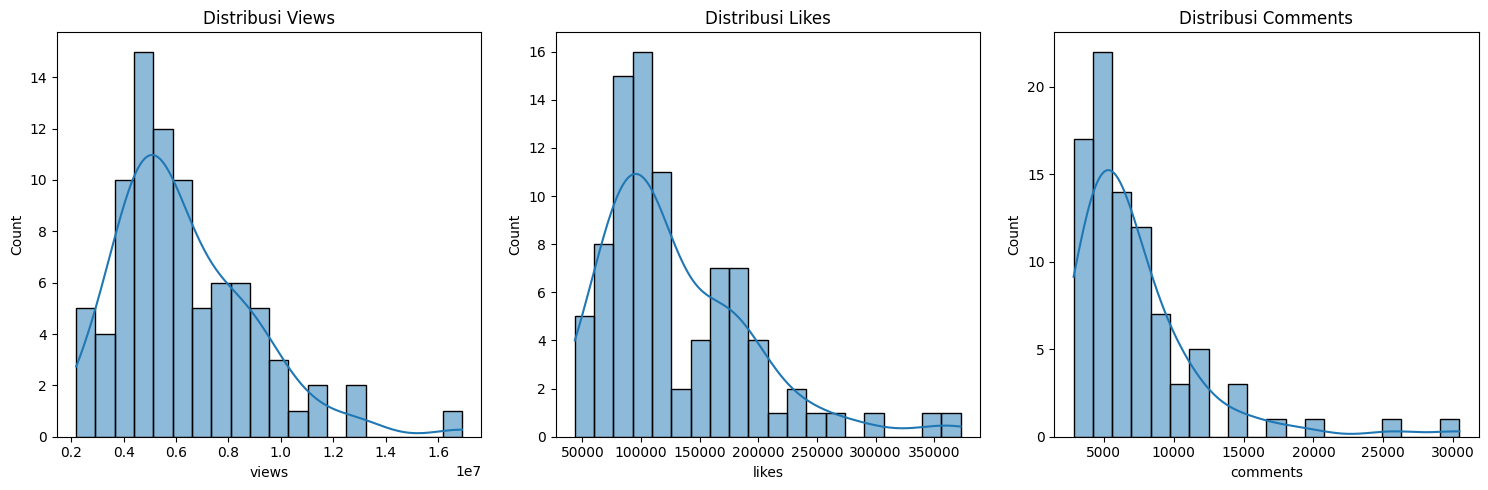

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df["views"], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Distribusi Views")

sns.histplot(df["likes"], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Distribusi Likes")

sns.histplot(df["comments"], bins=20, kde=True, ax=ax[2])
ax[2].set_title("Distribusi Comments")

plt.tight_layout()
plt.show()

**Data Quality Assessment**

In [102]:
# Convert 'views', 'likes', and 'comments' komlom ke numerik
df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['comments'] = pd.to_numeric(df['comments'])

# Deteksi Outlier
print("\nDATA QUALITY ASSESSMENT")
print("\nDeteksi Outlier dengan IQR Method")

# Memastikan df_selected berisi kolom numeric
df_selected = df[['views', 'likes', 'comments']]

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_selected < lower_bound) | (df_selected > upper_bound)).sum()
print(outliers)


DATA QUALITY ASSESSMENT

Deteksi Outlier dengan IQR Method
views       1
likes       3
comments    7
dtype: int64


Cek outline dengan boxplot

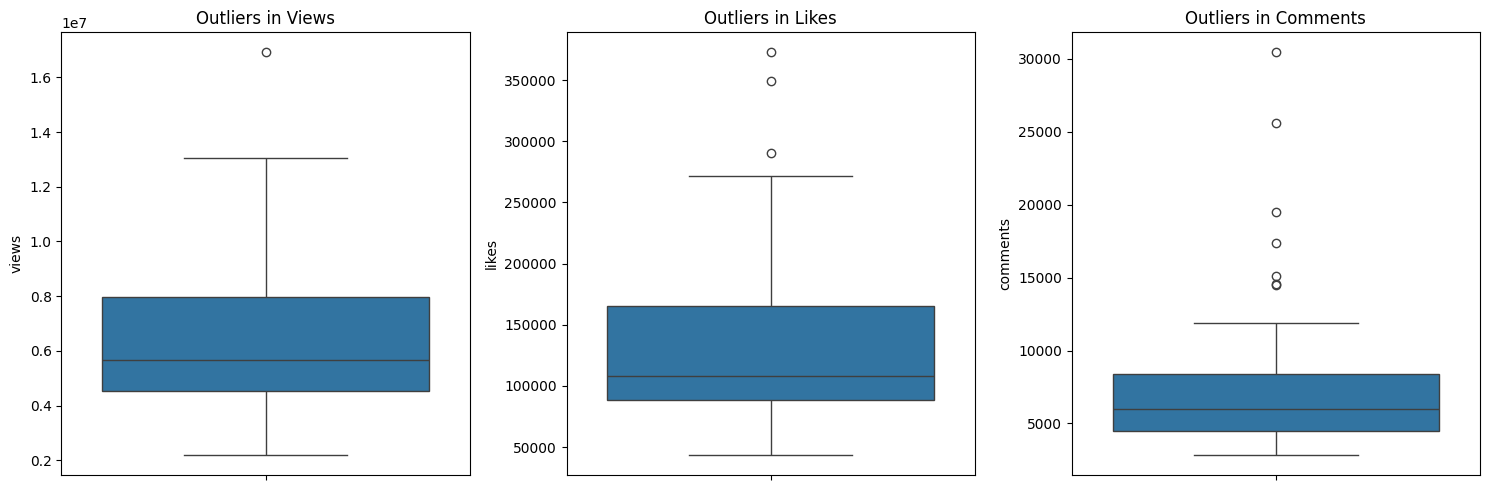

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(y=df["views"], ax=ax[0])
ax[0].set_title("Outliers in Views")

sns.boxplot(y=df["likes"], ax=ax[1])
ax[1].set_title("Outliers in Likes")

sns.boxplot(y=df["comments"], ax=ax[2])
ax[2].set_title("Outliers in Comments")

plt.tight_layout()
plt.show()

# **Data Preperation**

Data Selection

In [104]:
# Menampilkan semua kolom
print("Kolom yang tersedia:")
print(df.columns)

# Memilih hanya kolom yang relevan untuk clustering
df_selected = df[["views", "likes", "comments"]]
print("\nData setelah seleksi fitur:")
print(df_selected.head())


Kolom yang tersedia:
Index(['video_id', 'views', 'likes', 'comments'], dtype='object')

Data setelah seleksi fitur:
      views   likes  comments
0   4478968   61051      4167
1   5909093   76883      4171
2   4734367   67843      3562
3   6214541  112849      4496
4  10489239  179548      7189


Data Cleaning

In [105]:
from scipy.stats import zscore

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

threshold = 3
# Menghapus outlier
df_cleaned = df_selected[~((df_selected < lower_bound) | (df_selected > upper_bound)).any(axis=1)]

print(f"\nData setelah membersihkan outlier (sebelumnya {df_selected.shape[0]}, sekarang {df_cleaned.shape[0]})")



Data setelah membersihkan outlier (sebelumnya 87, sekarang 79)


Data Transformation

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[['views', 'likes', 'comments']])
df_transformed = pd.DataFrame(scaled_data, columns=['views', 'likes', 'comments'])
print("\nData setelah transformasi:")
print(df_transformed.head())


Data setelah transformasi:
      views     likes  comments
0 -0.701620 -1.241254 -0.875189
1  0.018794 -0.896141 -0.873449
2 -0.572965 -1.093199 -1.138370
3  0.172660 -0.112137 -0.732071
4  2.326003  1.341800  0.439409


In [107]:
df_transformed['engagement_rate'] = (df_transformed['likes'] + df_transformed['comments']) / df_transformed['views']
df_transformed['engagement_rate'] = np.where(df_transformed['views'] == 0, 0, df_transformed['engagement_rate'])

print("\nData setelah menambahkan engagement_rate:")
print(df_transformed.head())


Data setelah menambahkan engagement_rate:
      views     likes  comments  engagement_rate
0 -0.701620 -1.241254 -0.875189         3.016512
1  0.018794 -0.896141 -0.873449       -94.159438
2 -0.572965 -1.093199 -1.138370         3.894777
3  0.172660 -0.112137 -0.732071        -4.889415
4  2.326003  1.341800  0.439409         0.765781


Data Reduction


Data setelah reduksi dimensi dengan PCA:
         PC1       PC2  Cluster
0   2.304670 -1.652776        0
1 -94.864209 -0.260584        1
2   3.182326 -1.639771        0
3  -5.591712 -0.323994        0
4   0.081330  2.399249        0


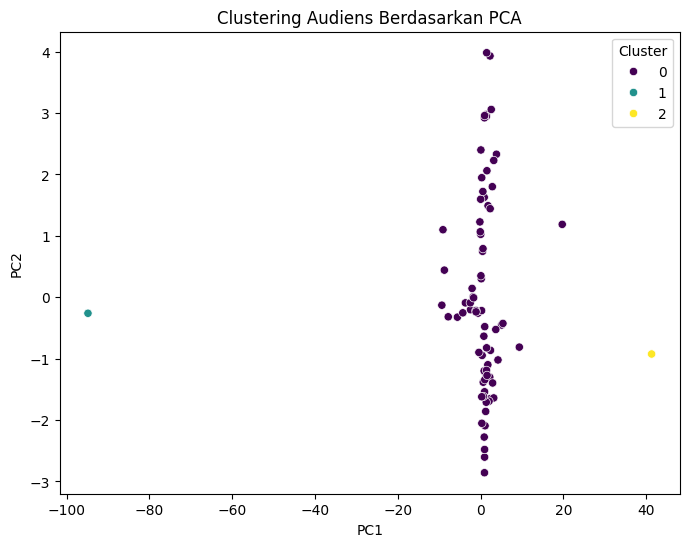

In [108]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Inisialisasi PCA untuk mereduksi ke 2 dimensi
pca = PCA(n_components=2, random_state=42)
df_reduced = pd.DataFrame(pca.fit_transform(df_transformed), columns=["PC1", "PC2"])

kmeans = KMeans(n_clusters=3, random_state=42)
df_reduced["Cluster"] = kmeans.fit_predict(df_reduced)

# Inisialisasi PCA untuk mereduksi ke 2 dimensi
print("\nData setelah reduksi dimensi dengan PCA:")
print(df_reduced.head())

# Visualisasi PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_reduced["PC1"], y=df_reduced["PC2"], hue=df_reduced["Cluster"], palette="viridis")
plt.title("Clustering Audiens Berdasarkan PCA")
plt.show()

# **Modeling**

**K-MEANS**

In [161]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

if 'engagement_rate' not in df_transformed.columns:
    df_transformed['engagement_rate'] = (df_transformed['likes'] + df_transformed['comments']) / df_transformed['views']
    df_transformed['engagement_rate'] = np.where(df_transformed['views'] == 0, 0, df_transformed['engagement_rate'])

kmeans.fit(df_transformed[['views', 'likes', 'comments', 'engagement_rate']])

KMeans(n_clusters=3, random_state=42)

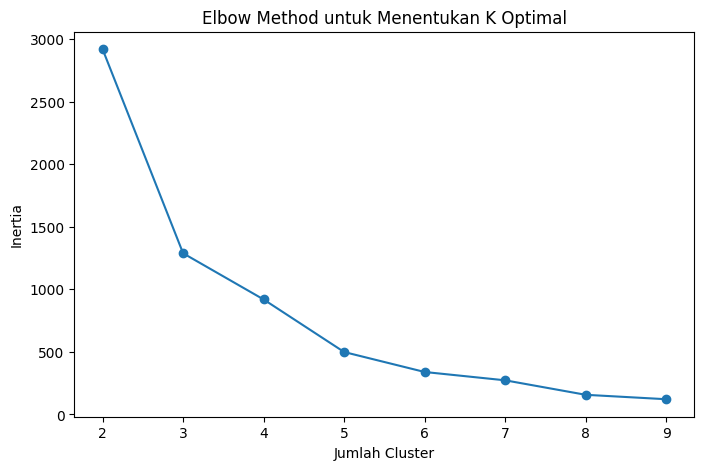

In [162]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster optimal dengan Elbow Method
distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed[['views', 'likes', 'comments', 'engagement_rate']])
    distortions.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.show()

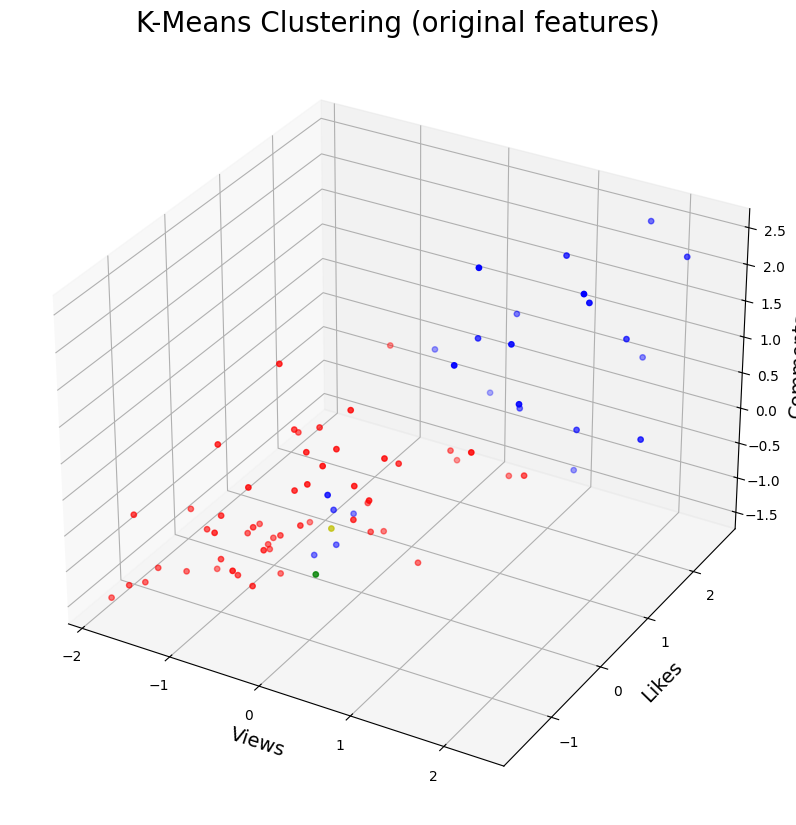

In [163]:
import matplotlib.pyplot as plt
import matplotlib.colors

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_transformed)

# Buat dataframe asli + label
df_transformed = pd.DataFrame(df_transformed, columns=['views', 'likes', 'comments', 'engagement_rate'])
df_transformed['KMeans_labels'] = kmeans_labels
colors = ['r', 'g', 'b', 'y']

# Visualisasi berdasarkan data asli yang sudah di-scale
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_transformed['views'], df_transformed['likes'], df_transformed['comments'],
           c=df_transformed['KMeans_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
ax.set_title('K-Means Clustering (original features)', fontsize=20)
ax.set_xlabel('Views', fontsize=14)
ax.set_ylabel('Likes', fontsize=14)
ax.set_zlabel('Comments', fontsize=14)
plt.show()

In [204]:
from sklearn.cluster import KMeans

# Gunakan k optimal hasil evaluasi
k_means_opt = KMeans(n_clusters=3, random_state=42)

# Fit model ke data
k_means_opt.fit(df_transformed[['views', 'likes', 'comments', 'engagement_rate']])

# Tambahkan label cluster ke dataframe
df_transformed['k_means_opt_labels'] = k_means_opt.labels_

# Cek distribusi cluster
print(df_transformed['k_means_opt_labels'].value_counts())
print(df_transformed.head())


k_means_opt_labels
0    77
1     1
2     1
Name: count, dtype: int64
      views     likes  comments  engagement_rate  KMeans_labels  \
0 -0.701620 -1.241254 -0.875189         3.016512              0   
1  0.018794 -0.896141 -0.873449       -94.159438              1   
2 -0.572965 -1.093199 -1.138370         3.894777              0   
3  0.172660 -0.112137 -0.732071        -4.889415              0   
4  2.326003  1.341800  0.439409         0.765781              2   

   k_means_opt_labels  DBSCAN_labels  DBSCAN_opt_labels  
0                   0             -1                  0  
1                   1             -1                 -1  
2                   0             -1                  0  
3                   0             -1                  1  
4                   0             -1                  1  


**Tuning**

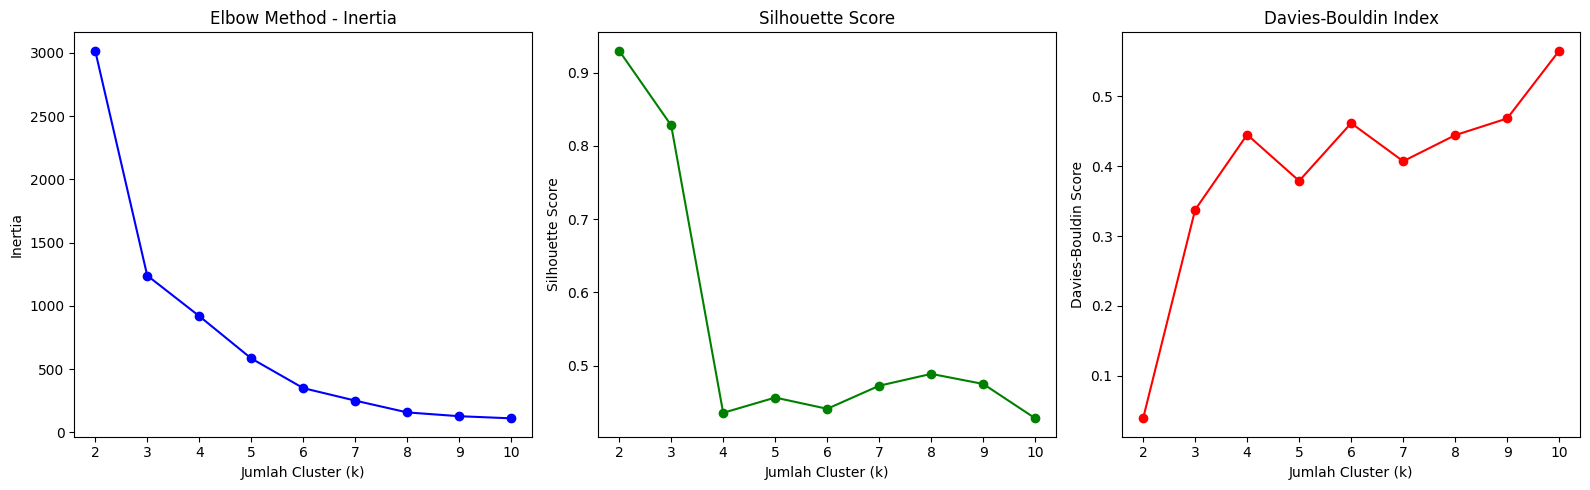

In [205]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

inertias = []
silhouette_scores = []
davies_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_transformed)
    labels = kmeans.labels_

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_transformed, labels))
    davies_scores.append(davies_bouldin_score(df_transformed, labels))

# Plot hasil tuning
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method - Inertia')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 3)
plt.plot(k_range, davies_scores, 'ro-')
plt.title('Davies-Bouldin Index')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

**DBSCAN**

In [206]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df_transformed[['views', 'likes', 'comments', 'engagement_rate']])

DBSCAN()

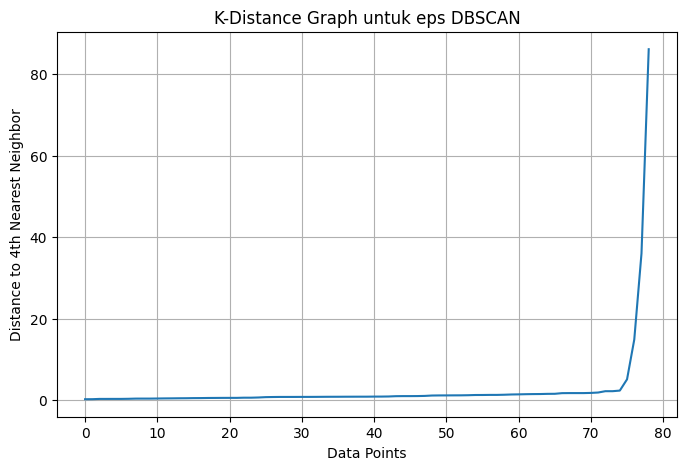

In [207]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_transformed)
distances, indices = neighbors_fit.kneighbors(df_transformed)

# Urutkan lalu plot
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 4th Nearest Neighbor")
plt.title("K-Distance Graph untuk eps DBSCAN")
plt.grid()
plt.show()


In [208]:
df_transformed['DBSCAN_labels']=dbscan.labels_
print(df.head())

      video_id     views   likes  comments
0  EMZdc03JWEg   4478968   61051      4167
1  sNw4Hf9qeko   5909093   76883      4171
2  M3jIteZtZAo   4734367   67843      3562
3  -j_yu-qc9eY   6214541  112849      4496
4  t7n4PW-ofNg  10489239  179548      7189


In [209]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_transformed[['views', 'likes', 'comments', 'engagement_rate']])

df_transformed['DBSCAN_labels'] = dbscan_labels
print(df_transformed.head())

      views     likes  comments  engagement_rate  KMeans_labels  \
0 -0.701620 -1.241254 -0.875189         3.016512              0   
1  0.018794 -0.896141 -0.873449       -94.159438              1   
2 -0.572965 -1.093199 -1.138370         3.894777              0   
3  0.172660 -0.112137 -0.732071        -4.889415              0   
4  2.326003  1.341800  0.439409         0.765781              2   

   k_means_opt_labels  DBSCAN_labels  DBSCAN_opt_labels  
0                   0             -1                  0  
1                   1             -1                 -1  
2                   0             -1                  0  
3                   0             -1                  1  
4                   0             -1                  1  


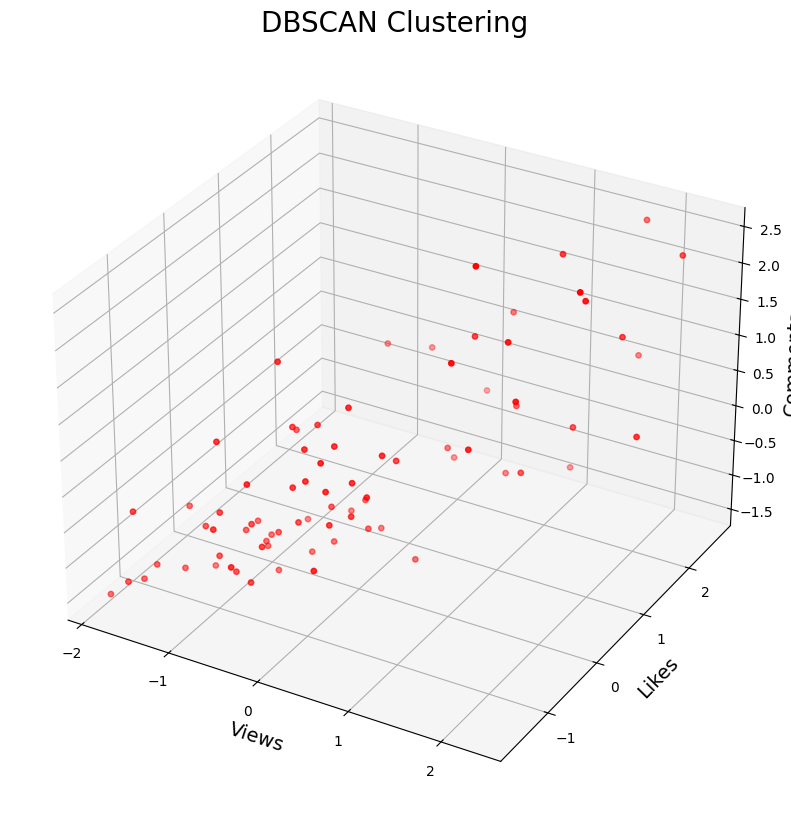

In [210]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_transformed['views'], df_transformed['likes'], df_transformed['comments'], c=df_transformed['DBSCAN_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
ax.set_title('DBSCAN Clustering', fontsize=20)
ax.set_xlabel('Views', fontsize=14)
ax.set_ylabel('Likes', fontsize=14)
ax.set_zlabel('Comments', fontsize=14)
plt.show()

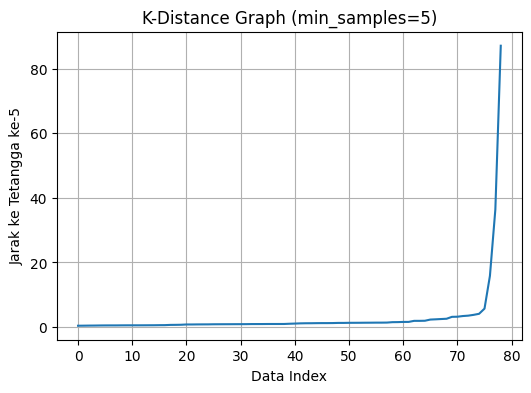

In [211]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_transformed)
distances, indices = neighbors_fit.kneighbors(df_transformed)

distances = np.sort(distances[:, 4])
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.title('K-Distance Graph (min_samples=5)')
plt.xlabel('Data Index')
plt.ylabel('Jarak ke Tetangga ke-5')
plt.grid(True)
plt.show()

In [212]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

params = [(0.2, 5), (0.3, 5), (0.4, 5), (0.3, 10), (0.5, 7)]
for eps, min_samples in params:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_transformed)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    silhouette = silhouette_score(df_transformed, labels) if n_clusters > 1 else -1

    print(f"eps={eps}, min_samples={min_samples} → clusters={n_clusters}, noise={n_noise}, silhouette={silhouette:.3f}")

eps=0.2, min_samples=5 → clusters=0, noise=79, silhouette=-1.000
eps=0.3, min_samples=5 → clusters=0, noise=79, silhouette=-1.000
eps=0.4, min_samples=5 → clusters=0, noise=79, silhouette=-1.000
eps=0.3, min_samples=10 → clusters=0, noise=79, silhouette=-1.000
eps=0.5, min_samples=7 → clusters=1, noise=72, silhouette=-1.000


In [213]:
from sklearn.cluster import DBSCAN

dbscan_opt = DBSCAN(eps=4.5, min_samples=7)
dbscan_opt.fit(df_transformed)

df_transformed['DBSCAN_opt_labels'] = dbscan_opt.labels_
print(df_transformed['DBSCAN_opt_labels'].value_counts())
print(df_transformed.head())

DBSCAN_opt_labels
 0    76
-1     3
Name: count, dtype: int64
      views     likes  comments  engagement_rate  KMeans_labels  \
0 -0.701620 -1.241254 -0.875189         3.016512              0   
1  0.018794 -0.896141 -0.873449       -94.159438              1   
2 -0.572965 -1.093199 -1.138370         3.894777              0   
3  0.172660 -0.112137 -0.732071        -4.889415              0   
4  2.326003  1.341800  0.439409         0.765781              2   

   k_means_opt_labels  DBSCAN_labels  DBSCAN_opt_labels  
0                   0             -1                  0  
1                   1             -1                 -1  
2                   0             -1                  0  
3                   0             -1                  0  
4                   0             -1                  0  


**EVALUASI**

In [214]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluasi K-Means
print("\nK-Means Evaluation:")
kmeans_labels = kmeans.labels_
print(f"Silhouette Score: {silhouette_score(df_transformed, kmeans_labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_transformed, kmeans_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(df_transformed, kmeans_labels):.2f}")


K-Means Evaluation:
Silhouette Score: 0.4092
Davies-Bouldin Index: 0.5715
Calinski-Harabasz Score: 829.13


In [215]:
# Evaluasi DBSCAN
dbscan_labels = dbscan.labels_

# Mengecek apakah cluster DBSCAN valid untuk evaluasi (minimal 2 cluster unik)
if len(set(dbscan_labels)) > 1 and -1 in set(dbscan_labels):
    dbscan_labels_filtered = dbscan_labels[df_transformed.index]
    print("\nDBSCAN Evaluation:")
    print(f"Silhouette Score: {silhouette_score(df_transformed, dbscan_labels_filtered):.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(df_transformed, dbscan_labels_filtered):.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_score(df_transformed, dbscan_labels_filtered):.2f}")
else:
    print("\nDBSCAN Evaluation: Tidak cukup cluster untuk evaluasi (hasil mungkin semua noise atau hanya 1 cluster)")


DBSCAN Evaluation:
Silhouette Score: -0.3687
Davies-Bouldin Index: 2.5571
Calinski-Harabasz Score: 0.19


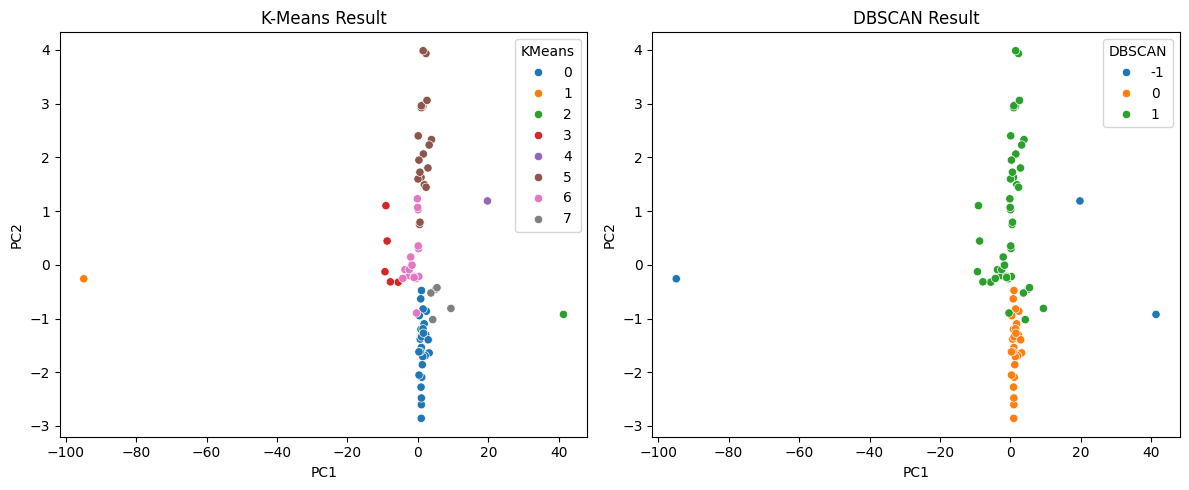

In [203]:
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_transformed[['views', 'likes', 'comments', 'engagement_rate']])

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['KMeans'] = df_transformed['k_means_opt_labels']
pca_df['DBSCAN'] = df_transformed['DBSCAN_opt_labels']


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans', palette='tab10')
plt.title('K-Means Result')

plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN', palette='tab10')
plt.title('DBSCAN Result')

plt.tight_layout()
plt.show()

**Aalisis Cluster**

In [216]:
# Analisis deskriptif tiap cluster
cluster_summary = df_transformed.groupby('k_means_opt_labels').agg(
    jumlah_video=('k_means_opt_labels', 'count'),
    rata2_views=('views', 'mean'),
    rata2_likes=('likes', 'mean'),
    rata2_comments=('comments', 'mean'),
    rata2_engagement_rate=('engagement_rate', 'mean')
).reset_index()

# Menampilkan ringkasan
print("Ringkasan Metrik Engagement per Cluster:")
print(cluster_summary)

import pandas as pd
from IPython.display import display
display(cluster_summary)

Ringkasan Metrik Engagement per Cluster:
   k_means_opt_labels  jumlah_video  rata2_views  rata2_likes  rata2_comments  \
0                   0            77     0.000070     0.018435        0.017732   
1                   1             1     0.018794    -0.896141       -0.873449   
2                   2             1    -0.024155    -0.523322       -0.491946   

   rata2_engagement_rate  
0               1.392251  
1             -94.159438  
2              42.030603  


,k_means_opt_labels,jumlah_video,rata2_views,rata2_likes,rata2_comments,rata2_engagement_rate
0,0,77,0.000070,0.018435,0.017732,1.392251
1,1,1,0.018794,-0.896141,-0.873449,-94.159438
2,2,1,-0.024155,-0.523322,-0.491946,42.030603


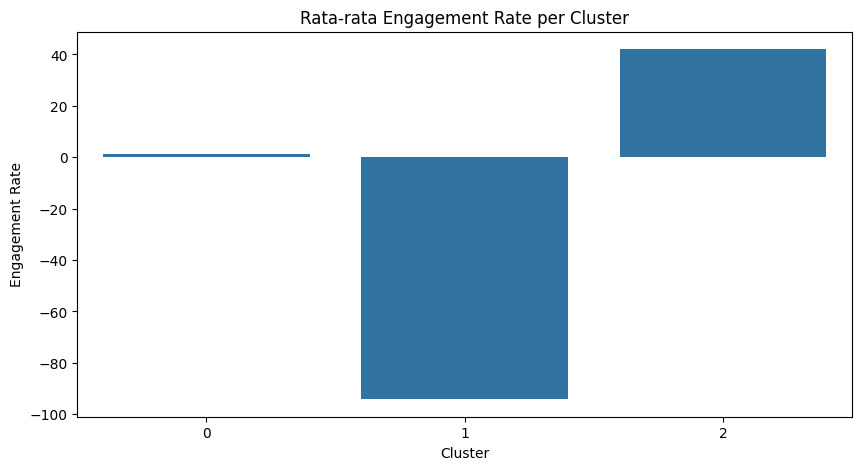

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=cluster_summary, x='k_means_opt_labels', y='rata2_engagement_rate')
plt.title('Rata-rata Engagement Rate per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Engagement Rate')
plt.show()